In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [5]:
display (os.getcwd())


'/Users/saikrishnaganta'

In [10]:
path = '/Users/saikrishnaganta/Acmegrade/Data Science/Projects/PRJ Sales Forecasting'

In [42]:
dt = pd.read_csv('Train.csv')
display (dt.head())

,Item_Identifier,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
print (dt.shape)

(8523, 13)


In [44]:
display (dt.columns)

Index(['Item_Identifier', 'ID', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [46]:
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7063.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857213,0.066132,140.992782,1997.831867,2181.288914
std,4.643690,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.770000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [47]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   ID                         8523 non-null   object 
 2   Item_Weight                7063 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage:

None

In [48]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
ID                              3
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [49]:
display (dt.isnull().sum())

Item_Identifier                 0
ID                              0
Item_Weight                  1460
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [50]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)


['Item_Identifier',
 'ID',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [51]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)

['ID',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [52]:
for col in cat_col:
    print(col , len(dt[col].unique()))

ID 3
Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [53]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)

ID
ID
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

**************************************************
Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

*****************

In [54]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [55]:
display (dt['Item_Weight'].isnull().sum())

1460

In [56]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)

,Item_Identifier,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,FD,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,FD,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,FD,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,FD,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,FD,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,DR,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,DR,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NC,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,FD,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [57]:
Item_Weight_null['Item_Identifier'].value_counts()

Item_Identifier
FDW13    2
FDE08    2
FDP11    2
FDA36    2
FDQ13    2
        ..
FDZ48    1
FDK41    1
FDD57    1
FDJ21    1
NCN18    1
Name: count, Length: 1140, dtype: int64

In [58]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [59]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [61]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])

In [62]:
result = dt['Item_Weight'].isnull().sum()
display (result)


0

In [63]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [64]:
result= dt['Outlet_Size'].isnull().sum()
display (result)


2410

In [65]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,FD,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,FD,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,NC,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,FD,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,NC,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,FD,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,FD,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,FD,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [66]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [67]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [68]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [69]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [70]:
miss_bool = dt['Outlet_Size'].isnull()
for i, item in enumerate (dt['Outlet_Size']):
    if miss_bool[i]:
        dt['Outlet_Size'][i] = outlet_size_mode.loc['Outlet_Size',dt['Outlet_Type'][i] ]

In [71]:
display (dt['Outlet_Size'].isnull().sum())

0

In [72]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':["size"]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [73]:
display (sum(dt['Item_Visibility']==0))

526

In [74]:
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)


In [75]:
display(sum(dt['Item_Visibility']==0))

0

In [76]:
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [77]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [78]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [79]:
display (dt['New_Item_Type'].value_counts())

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [80]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [81]:

display (dt['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [82]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [83]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result)


Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [84]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [85]:
dt['Outlet_Years'] = 2024 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64


In [86]:
display (dt.head())

,Item_Identifier,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,25
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,25
3,FDX07,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,26
4,NCD19,NC,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,37


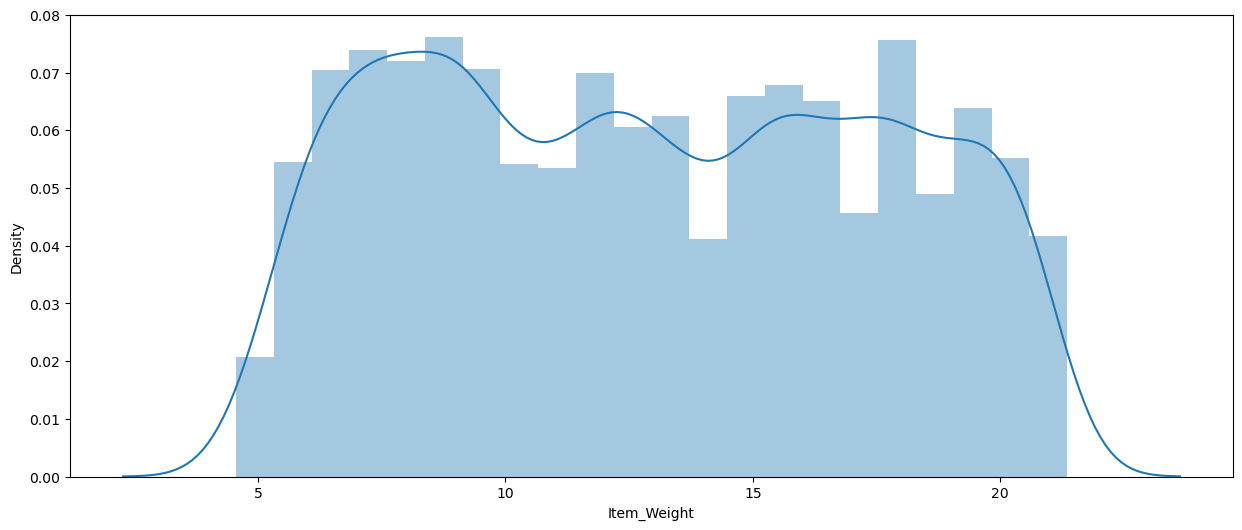

In [87]:
sns.distplot(dt['Item_Weight'])
plt.show()

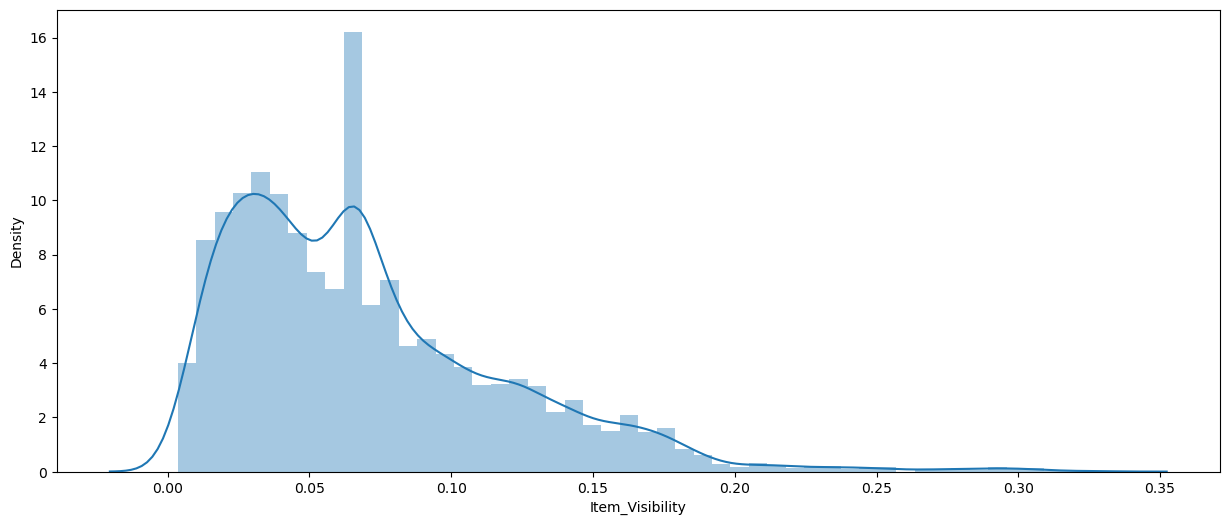

In [88]:
sns.distplot(dt['Item_Visibility'])
plt.show()

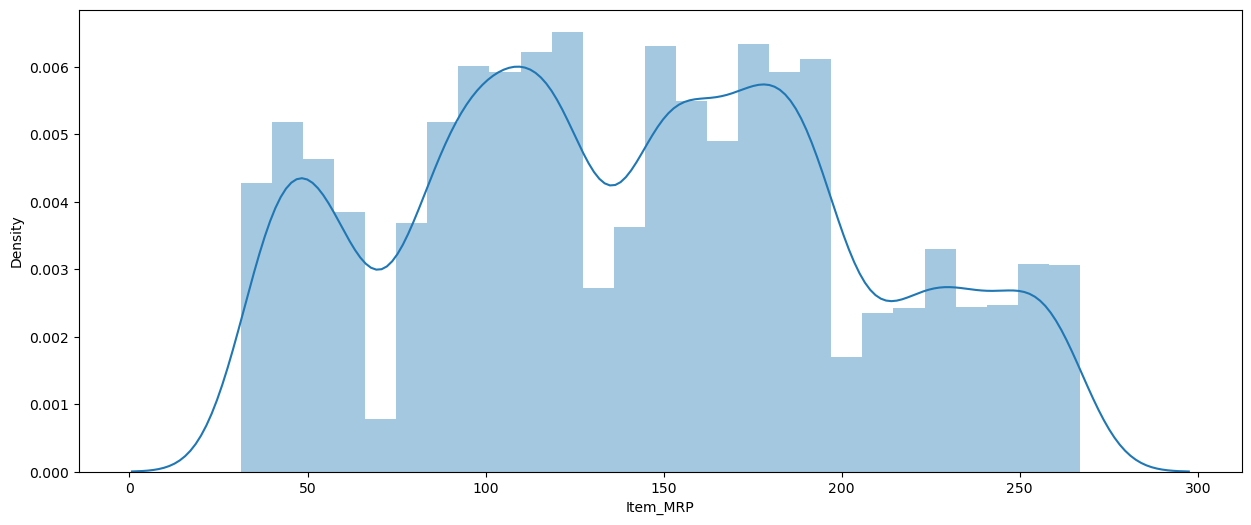

In [89]:
sns.distplot(dt['Item_MRP'])
plt.show()

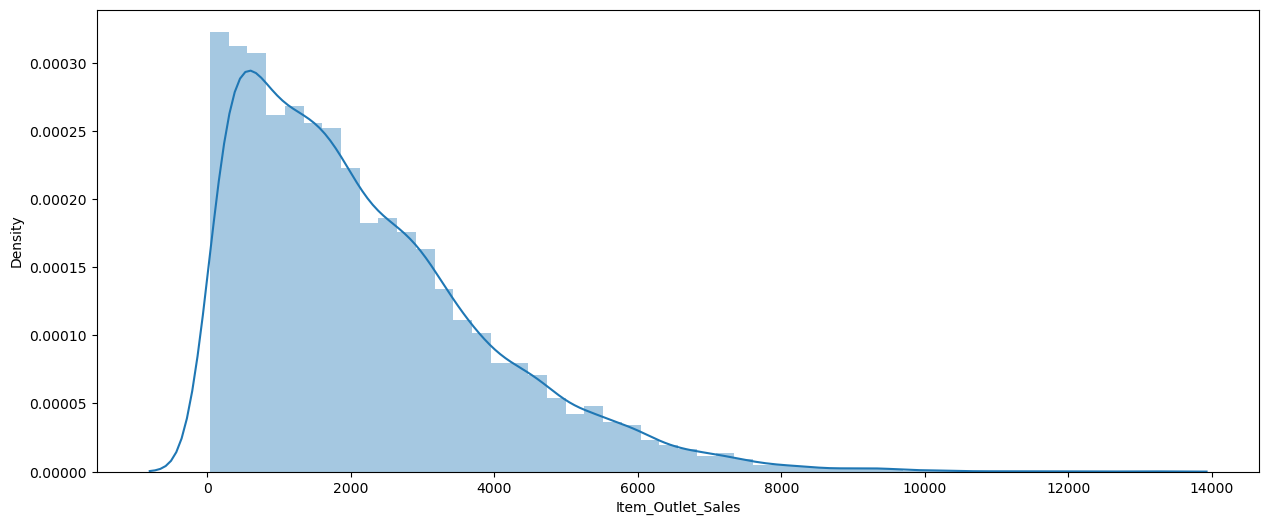

In [90]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

In [91]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

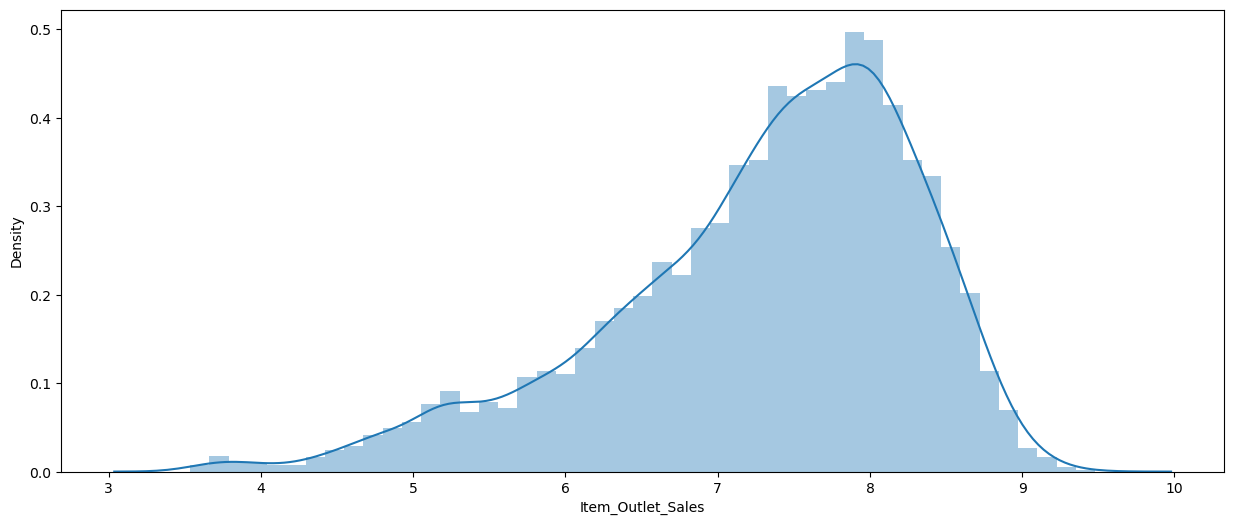

In [92]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

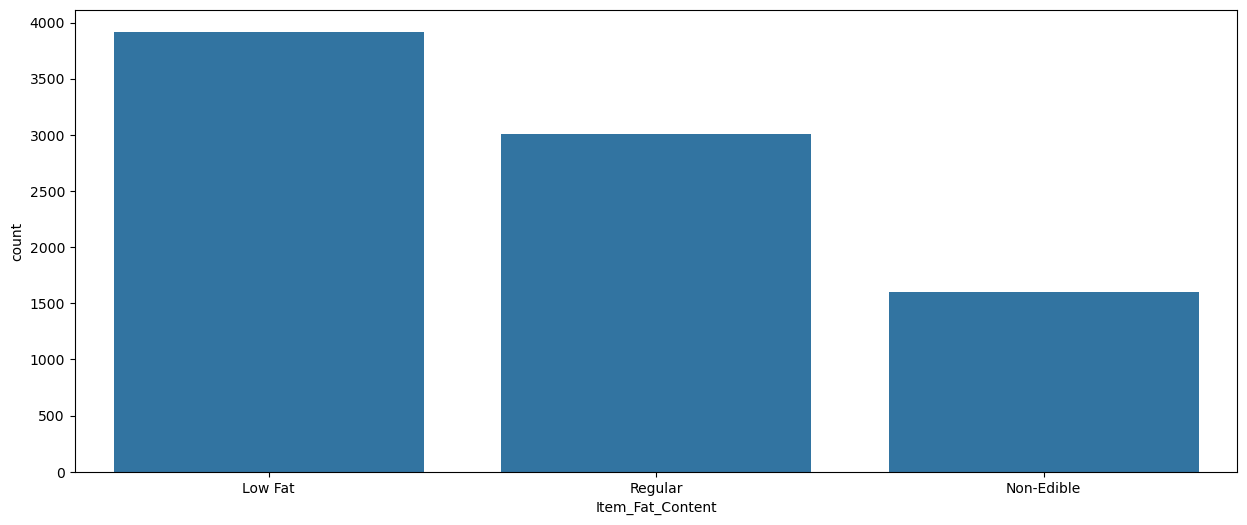

In [93]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()

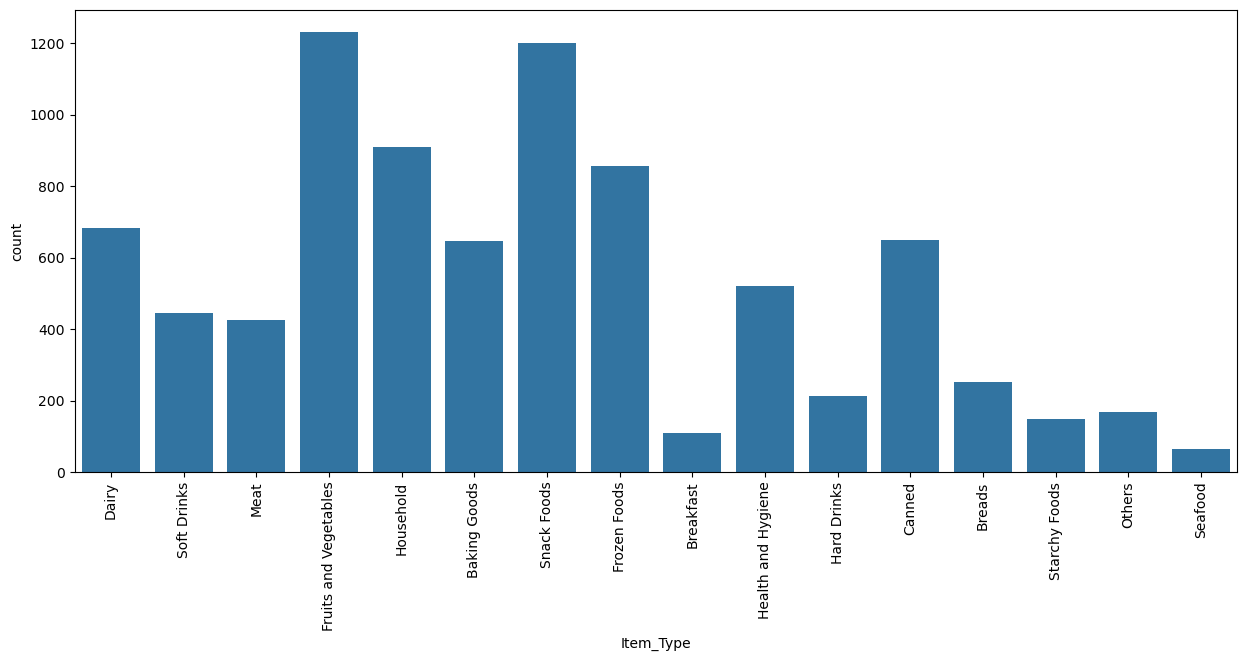

In [94]:
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()

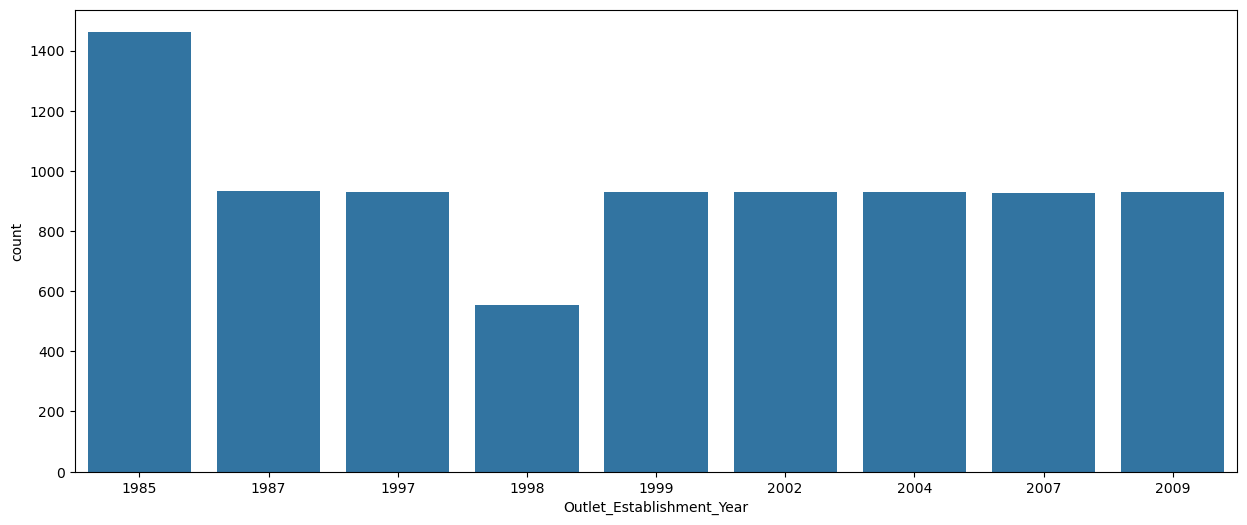

In [95]:
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()

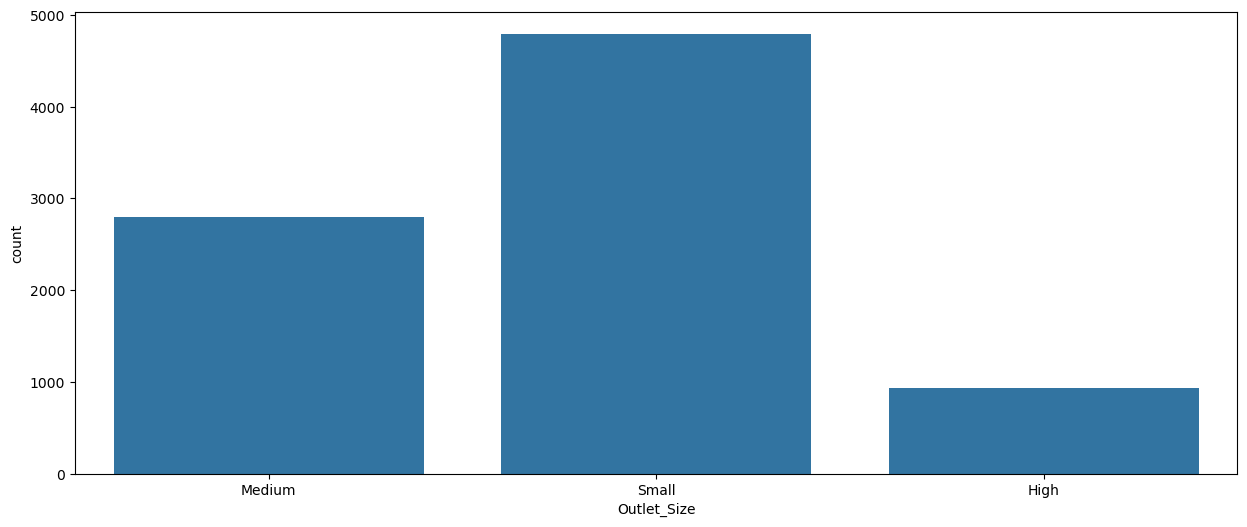

In [96]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()

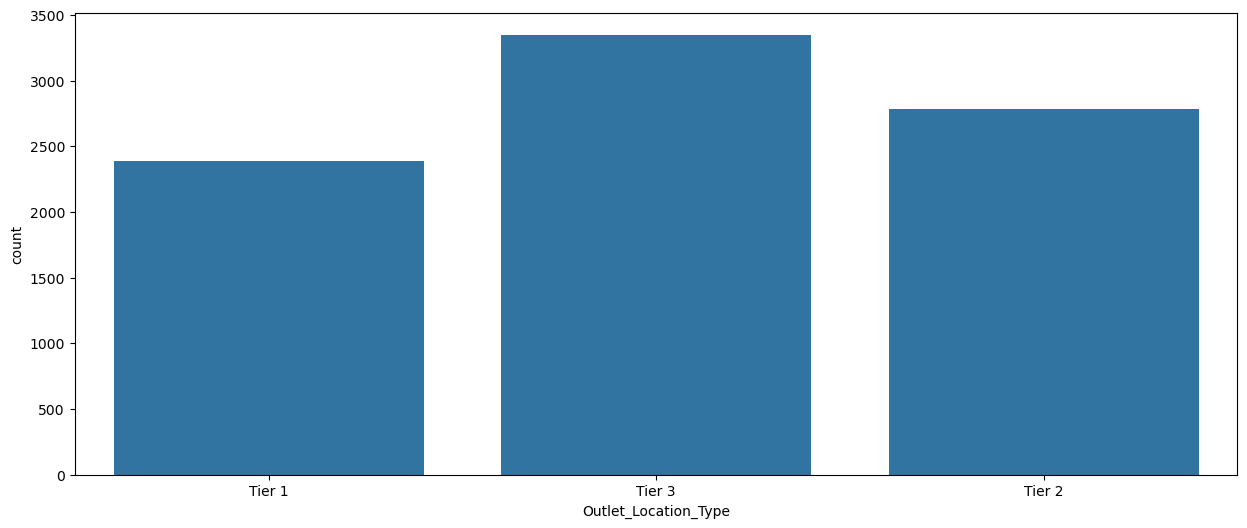

In [97]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()

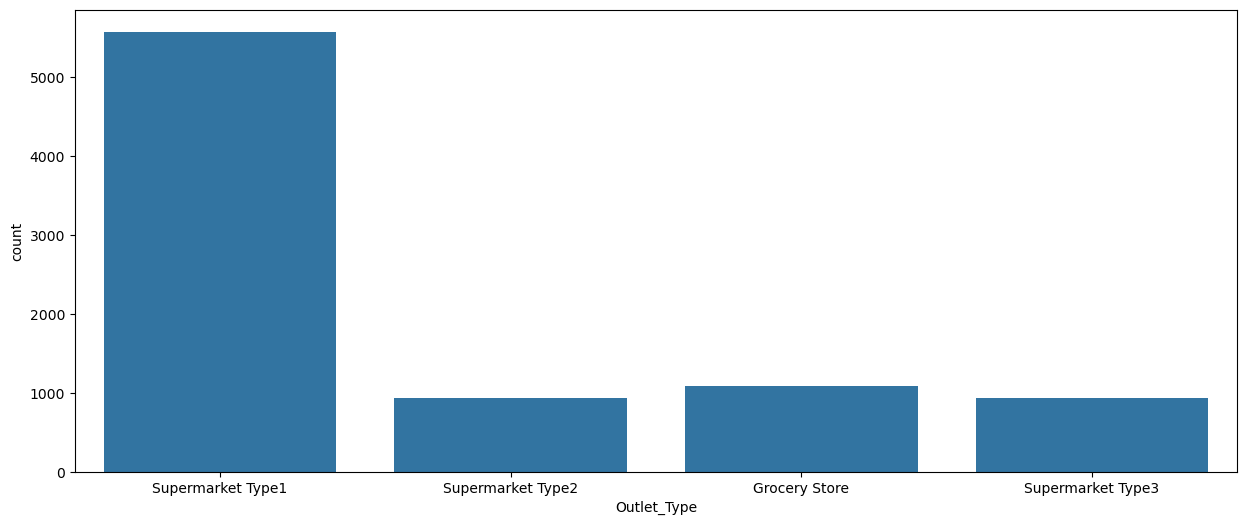

In [98]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()

In [99]:
display(dt.head(3))

,Item_Identifier,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25


In [100]:
dtc= dt.iloc[:,[1,3,5,7,11,13]]
display (dtc)

,ID,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Type,New_Item_Type
0,FD,Low Fat,Dairy,OUT049,Supermarket Type1,Food
1,DR,Regular,Soft Drinks,OUT018,Supermarket Type2,Drinks
2,FD,Low Fat,Meat,OUT049,Supermarket Type1,Food
3,FD,Regular,Fruits and Vegetables,OUT010,Grocery Store,Food
4,NC,Non-Edible,Household,OUT013,Supermarket Type1,Non-Consumable
...,...,...,...,...,...,...
8518,FD,Low Fat,Snack Foods,OUT013,Supermarket Type1,Food
8519,FD,Regular,Baking Goods,OUT045,Supermarket Type1,Food
8520,NC,Non-Edible,Health and Hygiene,OUT035,Supermarket Type1,Non-Consumable
8521,FD,Regular,Snack Foods,OUT018,Supermarket Type2,Food


In [105]:
display (dt.head())

,Item_Identifier,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25
3,FDX07,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,26
4,NCD19,NC,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,37


In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int64

In [107]:
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head())   

,Item_Identifier,ID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,FD,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,25,9
1,DRC01,DR,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,15,3
2,FDN15,FD,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,25,9
3,FDX07,FD,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,26,0
4,NCD19,NC,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,37,1


In [108]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
display (dt.head())

,Item_Identifier,ID,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,FD,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,25,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,DR,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,15,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,FD,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,25,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,FD,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,26,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,NC,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,37,...,0,0,1,0,1,0,0,0,0,1


In [109]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
display (X.head())

,ID,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FD,9.30,0.016047,4,249.8092,25,9,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,DR,5.92,0.019278,14,48.2692,15,3,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,FD,17.50,0.016760,10,141.6180,25,9,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,FD,19.20,0.066132,6,182.0950,26,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,NC,8.93,0.066132,9,53.8614,37,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [110]:
y = dt['Item_Outlet_Sales']
display (y.head())

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [145]:
from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))

'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   d2_absolute_error_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   max_error,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   neg_root_mean_squared_log_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples,   re

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):

    print ("Train Test Split")
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print (X.shape, y.shape)
    print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)

Model Report
Scoring - neg_mean_squared_error
[-0.02429465 -0.01805252 -0.00750129 -0.00923318 -0.01409722]
ABS Average of - neg_mean_squared_error 0.01463577017339746

R2 Score
[0.94265586 0.95908275 0.97703202 0.96564242 0.95994954]
Average R2 Score 0.9608725190484136

Accuracy
Accuracy of Test data
R2_Score: 0.9286517203958281
Accuracy of Training data
R2_Score: 0.9540086718135958
Accuracy of Complete data
R2_Score: 0.9573769126794053

Display actual and predicted values


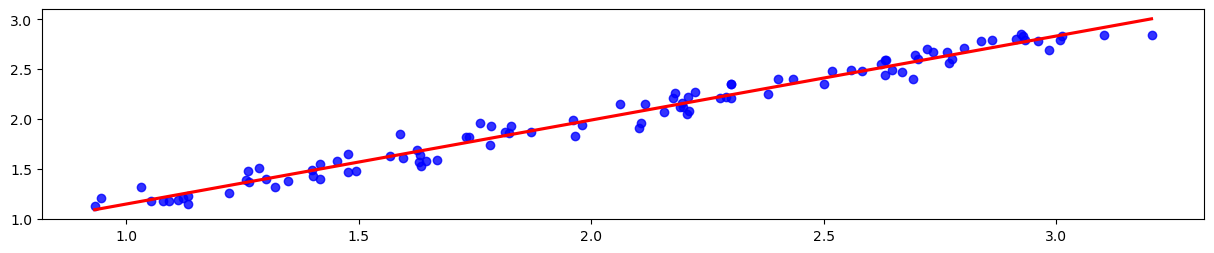

In [160]:
# training the model
model.fit(X_train, y_train) 

# perform cross-validation
cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Model Report")
print('Scoring - neg_mean_squared_error')
print(cv_score)    
cv_score = np.abs(np.mean(cv_score))    
print('ABS Average of - neg_mean_squared_error', cv_score)       
cv_score = cross_val_score(model, X, y, cv=5)
print()
print('R2 Score')
print(cv_score)    
cv_score = np.mean(cv_score)     
print('Average R2 Score', cv_score)    
print()

# Display Accuracy
print('Accuracy')
print('Accuracy of Test data')
y_test_pred = model.predict(X_test)
print('R2_Score:', r2_score(y_test, y_test_pred))
print('Accuracy of Training data')
y_train_pred = model.predict(X_train)
print('R2_Score:', r2_score(y_train, y_train_pred))
print('Accuracy of Complete data')
y_pred = model.predict(X)
print('R2_Score:', r2_score(y, y_pred))
print()

# Display graph with actual and predicted values 
plt.subplot(212)
print('Display actual and predicted values')
sns.regplot(x=y, y=y_pred, scatter_kws={"color": "b"}, 
        line_kws={"color": "r"}, ci=None)
plt.show()

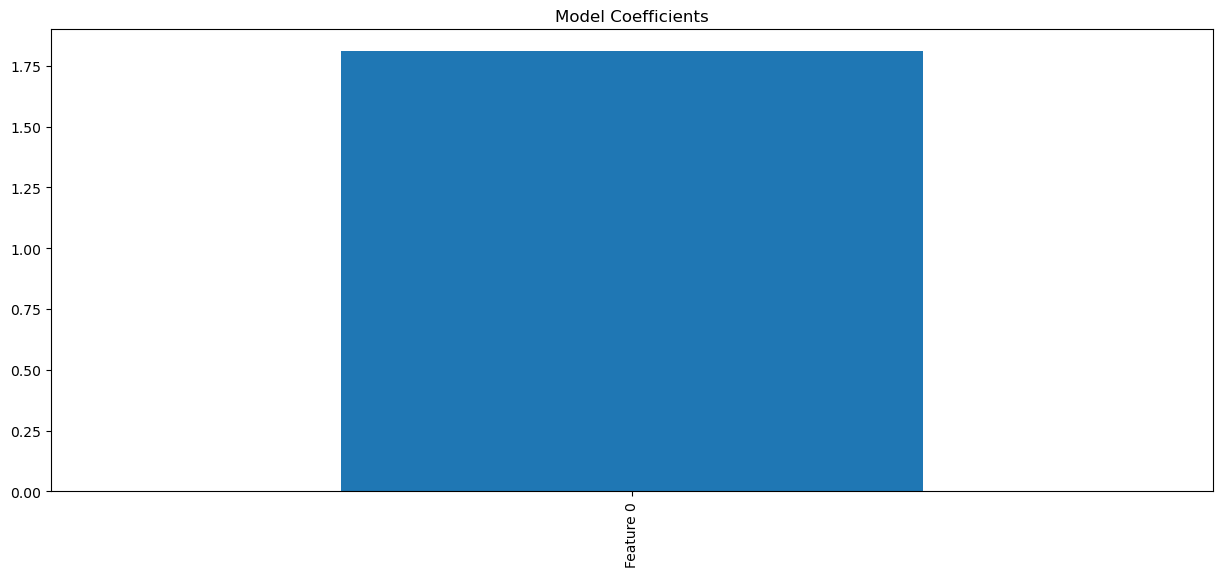

In [163]:
from sklearn.linear_model import Ridge
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the Ridge model
model = Ridge()

# Assuming X is a numpy array, we need to convert or handle it differently
# If you have feature names, you can create them here
feature_names = [f'Feature {i}' for i in range(X.shape[1])]  # Create feature names

# Fit the model to your data
model.fit(X, y)

# Now you can access the coefficients with proper feature names
coef = pd.Series(model.coef_, index=feature_names).sort_values()

# Plot the coefficients
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


(100, 1) (100,)
(70, 1) (30, 1) (70,) (30,)


In [167]:
#Parameters   
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#Param Grid    
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [169]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  # Added import for RandomForestRegressor

rf = RandomForestRegressor()
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                       scoring='neg_mean_squared_error', n_iter = 10, 
                       cv = 5, verbose=2, random_state=42, n_jobs = -1)
display(rf.fit(X_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30}
-0.02507404176678884

Accuracy
Accuracy of Test data
R2_Score: 0.9183665365565944
Accuracy of Training data
R2_Score: 0.9650863516804454
Accuracy of Complete data
R2_Score: 0.9536819876308682

Display actual and predicted values


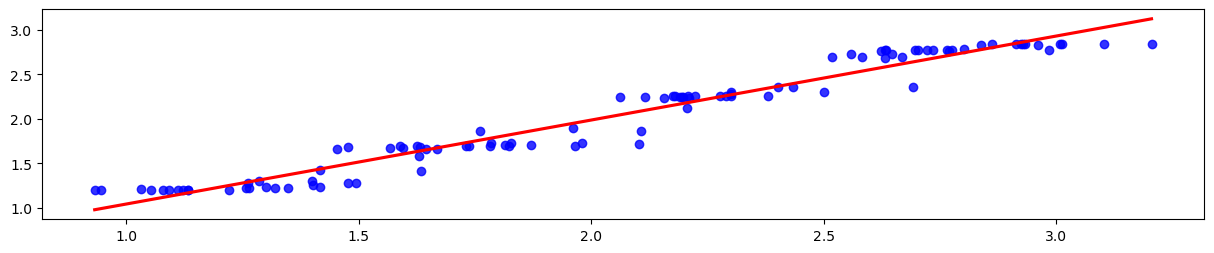

In [170]:
print(rf.best_params_)
print(rf.best_score_)

# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = rf.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = rf.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = rf.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()

In [171]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [172]:
#verbosity=-1 log files won’t be displayed 
lgb=LGBMRegressor(verbosity=-1)
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.2s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16a907860>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16a92b140>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16a9056a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16a904980>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16a93cda0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [173]:

print(lgb.best_params_)
print(lgb.best_score_)

{'gamma': 0.28164410892276964, 'learning_rate': 0.14562495076197482, 'max_depth': 3, 'n_estimators': 101, 'subsample': 0.8736932106048627}
-0.025407027037807388



Accuracy
Accuracy of Test data
R2_Score: 0.9410125116496862
Accuracy of Training data
R2_Score: 0.9647327490391846
Accuracy of Complete data
R2_Score: 0.9589878814498721

Display actual and predicted values


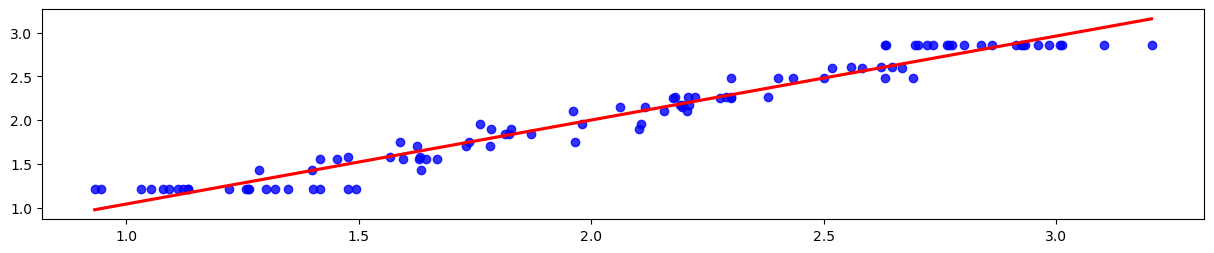

In [174]:
# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = lgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = lgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = lgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()


In [175]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [176]:
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16ac8e1b0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16ac8c560>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16ac8fce0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16ac8f800>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16a909a90>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'gamma': 0.28164410892276964, 'learning_rate': 0.14562495076197482, 'max_depth': 3, 'n_estimators': 101, 'subsample': 0.8736932106048627}
-0.025407027037807388

Accuracy
Accuracy of Test data
R2_Score: 0.9410125116496862
Accuracy of Training data
R2_Score: 0.9647327490391846
Accuracy of Complete data
R2_Score: 0.9589878814498721

Display actual and predicted values


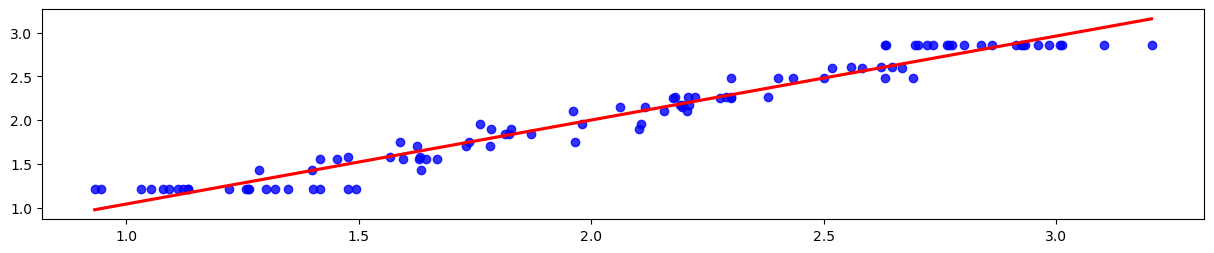

In [177]:
print(xgb.best_params_)
print(xgb.best_score_)

# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = xgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = xgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = xgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()